<a href="https://colab.research.google.com/github/FarhanFansuri/scikit-learn/blob/main/msib/tugas/build-ml-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition
## Latar Belakang

Tenggelamnya Titanic adalah salah satu kecelakaan kapal paling terkenal dalam sejarah.

Pada tanggal 15 April 1912, selama pelayaran perdana, RMS Titanic yang dianggap "tak bisa tenggelam" tenggelam setelah bertabrakan dengan gunung es. Sayangnya, tidak cukup banyak kapal penyelamat untuk semua penumpang yang berada di kapal, yang mengakibatkan kematian 1502 dari 2224 penumpang dan kru.

Meskipun ada beberapa unsur keberuntungan yang terlibat dalam bertahan hidup, tampaknya beberapa kelompok orang lebih mungkin untuk bertahan hidup daripada yang lain.

Dalam tantangan ini, kami meminta Anda untuk membangun model prediktif yang menjawab pertanyaan: "jenis orang seperti apa yang lebih mungkin untuk bertahan hidup?" menggunakan data penumpang (misalnya nama, usia, jenis kelamin, kelas sosial ekonomi, dll.).


## Tujuan Penelitian

Tujuan akhir dari analisis dataset Titanic adalah untuk membangun model prediktif yang dapat memprediksi kemungkinan kelangsungan hidup penumpang berdasarkan atribut-atribut tertentu yang dimiliki oleh setiap individu.

## Rumusan Masalah

Dengan menggunakan dataset yang berisi informasi tentang penumpang kapal Titanic, bagaimana kita dapat membangun model prediktif yang dapat memprediksi kemungkinan kelangsungan hidup penumpang berdasarkan atribut-atribut seperti usia, jenis kelamin, kelas tiket, dll.?

## Data yang akan dipakai

Nama dataset : Titanic Dataset
source : https://www.kaggle.com/datasets/sakshisatre/titanic-dataset

deskripsi : Kumpulan data yang berisi informasi tentang penumpang kapal Titanic adalah salah satu kumpulan data yang paling terkenal yang digunakan dalam ilmu data dan pembelajaran mesin. Kumpulan data ini dibuat untuk menganalisis dan memahami faktor-faktor yang memengaruhi tingkat kelangsungan hidup di antara penumpang selama tenggelamnya tragis RMS Titanic pada tanggal 15 April 1912.

## Metode

Berikut metode yang akan digunakan:
1. Logistic Regression
2. Decision Trees
3. Random Forest
4. SVM
5. Neural Network


# Preparation | Persiapan
## Import Libraries

In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

pd.set_option('display.max_rows', 10000)

## Get Data | Mendapatkan Data

### Data gathering

In [ ]:
titanic_dataset = pd.read_csv('/content/Titanic Dataset.csv')
titanic_dataset

### Data preprocessing and feature engineering

In [ ]:
# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Melakukan Label Encoding sebagai upaya quantifikasi pada label non-numerik
titanic_dataset['sex'] = encoder.fit_transform(titanic_dataset['sex'])
titanic_dataset['embarked'] = encoder.fit_transform(titanic_dataset['embarked'])

# Menghapus sebagian kolom
dropped_columns = ['name', 'ticket', 'cabin', 'body', 'boat', 'home.dest']
titanic_dataset = titanic_dataset[[col for col in titanic_dataset.columns if col not in dropped_columns]]



In [ ]:
correlation_matrix = titanic_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()


## Explore Data (EDA) | Eksplorasi Data

In [ ]:
titanic_dataset.describe()

In [ ]:
titanic_dataset.info()

## Clean Data | Membersihkan Data

In [ ]:
titanic_dataset = titanic_dataset.dropna(axis=0)

# Model Training | Pelatihan Model

### Feature dan Label

In [ ]:
x = titanic_dataset[[col for col in titanic_dataset.columns if col != 'survived']]
y = titanic_dataset['survived']

### Splitting data

In [54]:
# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Model Selection | Pemilihan Model

### Logistic Regression Model

In [55]:
# Inisialisasi model Logistic Regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Melatih model pada data latih
model.fit(x_train, y_train)

# Memprediksi label untuk data uji
predictions = model.predict(x_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7420382165605095


### Decission Trees

In [56]:
# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier()

# Melatih model pada data latih
dt_model.fit(x_train, y_train)

# Memprediksi label untuk data uji
dt_predictions = dt_model.predict(x_test)

# Mengukur akurasi model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7229299363057324


### Random Forest

In [57]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Melatih model pada data latih
rf_model.fit(x_train, y_train)

# Memprediksi label untuk data uji
rf_predictions = rf_model.predict(x_test)

# Mengukur akurasi model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7515923566878981


### Support Vector Machines (SVM)

In [58]:
# Inisialisasi model SVM
svm_model = SVC()

# Melatih model pada data latih
svm_model.fit(x_train, y_train)

# Memprediksi label untuk data uji
svm_predictions = svm_model.predict(x_test)

# Mengukur akurasi model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6592356687898089


### Neural Network

In [67]:
# Membuat kelas callback untuk menghentikan pelatihan saat akurasi mencapai 80%
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= 0.8:
            print("\nReached 80% accuracy, stopping training!")
            self.model.stop_training = True



# Inisialisasi model neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(len(x.columns),)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Membuat instance dari kelas callback
custom_callback = MyCustomCallback()

# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model pada data latih
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[custom_callback])

# Evaluasi model pada data uji
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
19/19 [==============================] - 1s 15ms/step - loss: 0.8740 - accuracy: 0.6524 - val_loss: 0.7902 - val_accuracy: 0.6122
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 0.6433 - accuracy: 0.6712 - val_loss: 0.7040 - val_accuracy: 0.6122
Epoch 3/10
19/19 [==============================] - 0s 5ms/step - loss: 0.6102 - accuracy: 0.6952 - val_loss: 0.6840 - val_accuracy: 0.6327
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5963 - accuracy: 0.6901 - val_loss: 0.6921 - val_accuracy: 0.6190
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6018 - accuracy: 0.6952 - val_loss: 0.6619 - val_accuracy: 0.6395
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5855 - accuracy: 0.7140 - val_loss: 0.6614 - val_accuracy: 0.6735
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5906 - accuracy: 0.6935 - val_loss: 0.6832 - val_accuracy: 0.6463
Epoch 8/10
19/19 [=

# Model Evaluation | Evaluasi Model

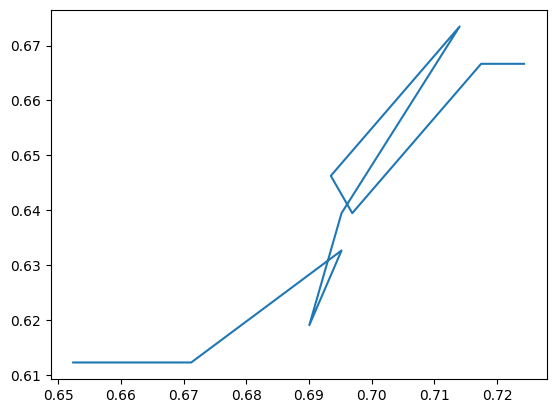

In [68]:
plt.plot(history.history['accuracy'], history.history['val_accuracy'])

## Conclusion | Kesimpulan